In [11]:
import numpy as np
import insightface
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
print('Numpy version : ',np.__version__)
print('insightface version : ',insightface.__version__)


Numpy version :  1.24.3
insightface version :  0.7.3


In [26]:
app = FaceAnalysis(
    # name = model_name_list[0]
    # providers=['CUDAExecutionProvider', 'CPUExecutionProvider']
    name='buffalo_l', providers=['CUDAExecutionProvider']
)
app.prepare(ctx_id=0, det_size=(640, 640))

img = ins_get_image('t1')
print(type(img))


faces = app.get(img)
res = img.copy()
swapper = insightface.model_zoo.get_model('inswapper_128_onnxFile/inswapper_128.onnx',download=False,download_zip=False)

res = img.copy()
for face in faces:
    swapper.get(res,face,source_face,paste_back=True)



Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/iffi/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/iffi/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/iffi/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/iffi/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/iffi/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size

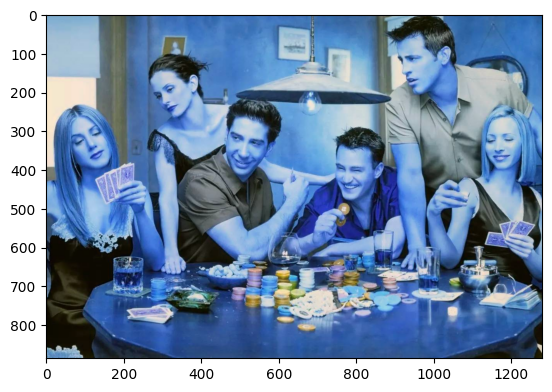

In [13]:
img = ins_get_image('t1')
plt.imshow(img)
plt.show()


In [14]:
faces = app.get(img)

/home/iffi/miniconda3/envs/insight/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [15]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

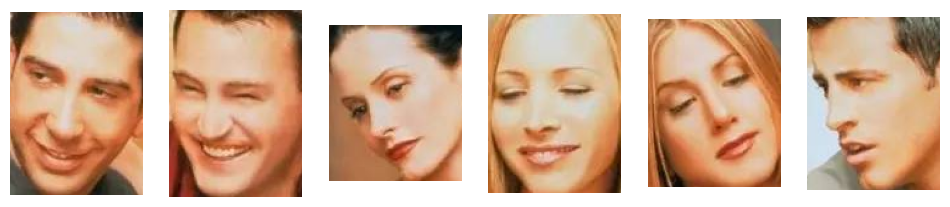

In [16]:
fig ,axes = plt.subplots(1,6,figsize=(12,5))

for i , face in enumerate(faces):
    
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axes[i].imshow( img[  bbox[1]:bbox[3] , bbox[0]:bbox[2],::-1 ])
    axes[i].axis('off')
    # bbox = []
    # break

In [17]:
swapper = insightface.model_zoo.get_model('inswapper_128_onnxFile/inswapper_128.onnx',download=False,download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [18]:
def plot_single_face(oface,title = 'add your title'):
    bbox = face['bbox']
    bbox = [ int(b) for b in bbox]
    
    plt.imshow(img[bbox[1]:bbox[3] , bbox[0]:bbox[2], ::-1   ])
    plt.title(title)
    plt.show()

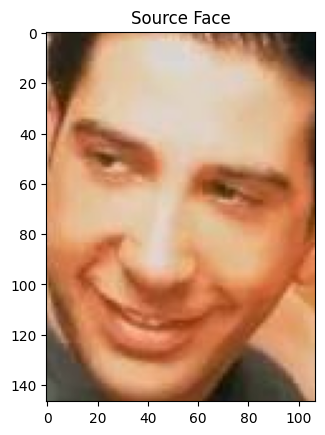

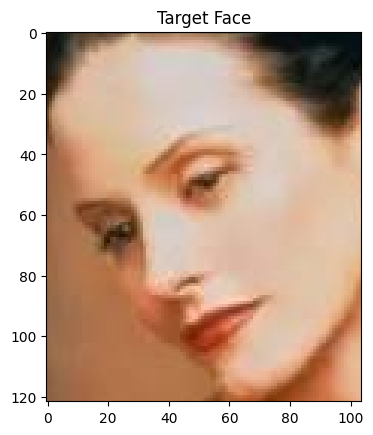

In [19]:
source_face = faces[0]
target_face = faces[2]
plot_single_face(face=source_face,title='Source Face')
plot_single_face(face=target_face,title='Target Face')



In [20]:
res = img.copy()
for face in faces:
    swapper.get(res,face,source_face,paste_back=True)

In [23]:
type(res)

numpy.ndarray

In [24]:
type(face)

insightface.app.common.Face

In [25]:
type(source_face)

insightface.app.common.Face

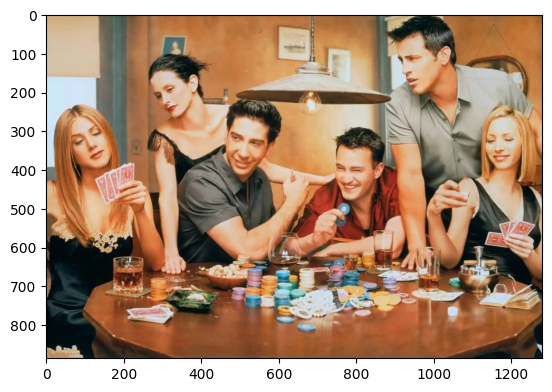

In [21]:
plt.imshow(res[:,:,::-1])
plt.show()

In [22]:
import cv2
import numpy as np
import insightface


model_name_list = ['buffalo_l','antelopev2','buffalo_m','buffalo_s']
app = FaceAnalysis(
    # name = model_name_list[0]
    # providers=['CUDAExecutionProvider', 'CPUExecutionProvider']
    name='buffalo_l', providers=['CUDAExecutionProvider']
)

app.prepare(ctx_id=0, det_size=(640, 640))

img = ins_get_image('t1')
faces = app.get(img)
rimg = app.draw_on(img, faces)

cv2.imwrite("./t1_output.jpg", rimg)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/iffi/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/iffi/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/iffi/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/iffi/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/iffi/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [1]:
import numpy as np

ModuleNotFoundError: No module named 'numpy'

set det-size: (640, 640)


/home/iffi/miniconda3/envs/insight/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

NameError: name 'rimg' is not defined